# Sentiment Analysis for Movie Ratings in IMDB
This project outlines different methodologies to analyse the sentiment analysis for movies in the movie rating platform IMBD. Different models and methods will be used in this project to analyse the reviews from the users.

## Description:
The dataset is comprised of tab-separated files with phrases from the Rotten Tomatoes dataset. The train/test split has been preserved for the purposes of benchmarking, but the sentences have been shuffled from their original order. Each Sentence has been parsed into many phrases by the Stanford parser. Each phrase has a PhraseId. Each sentence has a SentenceId. Phrases that are repeated (such as short/common words) are only included once in the data.

train.tsv contains the phrases and their associated sentiment labels. We have additionally provided a SentenceId so that you can track which phrases belong to a single sentence.
test.tsv contains just phrases. You must assign a sentiment label to each phrase.
The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

The dataset can be downloaded here: https://archive.ics.uci.edu/ml/datasets/spambase

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
plt.style.use('ggplot')

df = pd.read_csv('movie.csv')
df=df.reset_index().rename(columns={'index':'Id'})

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tmara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tmara\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\tmara\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\tmara\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [48]:
df.head(10)

,Id,text,label
0,0,I grew up (b. 1965) watching and loving the Th...,0
1,1,"When I put this movie in my DVD player, and sa...",0
2,2,Why do people who do not know what a particula...,0
3,3,Even though I have great interest in Biblical ...,0
4,4,Im a die hard Dads Army fan and nothing will e...,1
5,5,A terrible movie as everyone has said. What ma...,0
6,6,Finally watched this shocking movie last night...,1
7,7,I caught this film on AZN on cable. It sounded...,0
8,8,It may be the remake of 1987 Autumn's Tale aft...,1
9,9,My Super Ex Girlfriend turned out to be a plea...,1


In [13]:
df['text'][0]

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

<Axes: title={'center': 'Count of reviews by positive or negative'}, xlabel='label'>

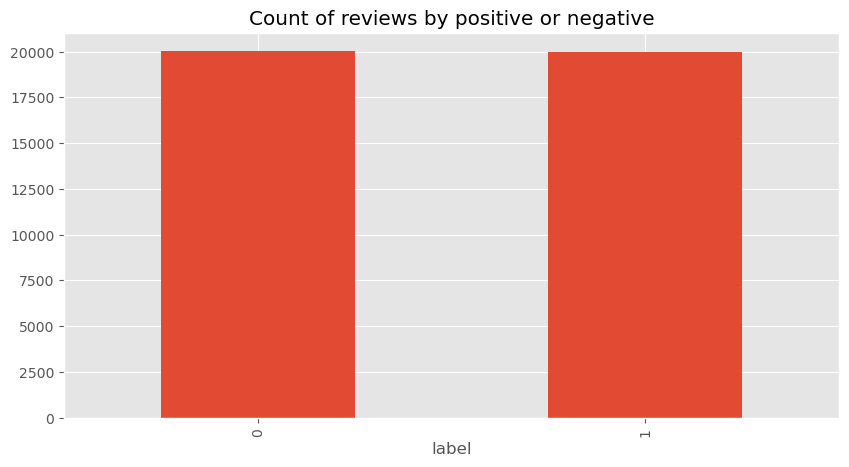

In [14]:
df['label'].value_counts().plot(kind='bar',title='Count of reviews by positive or negative',figsize=(10,5))

In [15]:
# Grab an example 

example=df['text'].values[500]

In [17]:
tokens=nltk.word_tokenize(example)

In [22]:
# Part taggs of speech for each word
tagged=nltk.pos_tag(tokens)

In [29]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Just/RB
  because/IN
  an/DT
  event/NN
  really/RB
  happened/VBD
  does/VBZ
  n't/RB
  mean/VB
  that/IN
  it/PRP
  will/MD
  make/VB
  a/DT
  good/JJ
  screenplay//NN
  movie/NN
  ./.
  The/DT
  (ORGANIZATION Cat/NNP)
  's/POS
  (PERSON Meow/NNP)
  ,/,
  by/IN
  (PERSON Peter/NNP Bogdanovich/NNP)
  claims/VBZ
  to/TO
  be/VB
  based/VBN
  on/IN
  actual/JJ
  events/NNS
  which/WDT
  happened/VBD
  on/IN
  a/DT
  cruise/NN
  hosted/VBN
  by/IN
  (PERSON William/NNP Randolph/NNP Hurst/NNP)
  ./.
  The/DT
  writer/NN
  paid/VBD
  more/JJR
  attention/NN
  to/TO
  creating/VBG
  a/DT
  bizarre/JJ
  cast/NN
  of/IN
  characters/NNS
  than/IN
  taking/VBG
  time/NN
  to/TO
  create/VB
  a/DT
  story/NN
  for/IN
  the/DT
  bizarre/JJ
  characters/NNS
  to/TO
  inhabit/VB
  ./.
  The/DT
  key/JJ
  moments/NNS
  of/IN
  the/DT
  story/NN
  seem/VBP
  implausible/JJ
  ;/:
  for/IN
  example/NN
  ,/,
  when/WRB
  (PERSON Hurst/NNP)
  accidentally/RB
  shoots/VBZ
  the/DT
  producer/NN
  ,

Label column is a binary classification of the sentiment 0 for negative 1 for positive.

# Traditional NLP VADER
- Valence Aware Dictionary and sEntiment Reasoner - Bag of words
- This approach does not identify relation between words and its significance

In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tmara\AppData\Roaming\nltk_data...


In [34]:
sia.polarity_scores("I'm so happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [35]:
sia.polarity_scores('This is the worst thing ever!')

{'neg': 0.468, 'neu': 0.532, 'pos': 0.0, 'compound': -0.6588}

In [37]:
sia.polarity_scores(example)

{'neg': 0.174, 'neu': 0.706, 'pos': 0.12, 'compound': -0.8723}

In [38]:
res={}
id=0
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['text']
    myid=id
    res[myid]=sia.polarity_scores(text)
    id+=1

  0%|          | 0/40000 [00:00<?, ?it/s]

In [49]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders 

,Id,neg,neu,pos,compound
0,0,0.084,0.780,0.136,0.6502
1,1,0.098,0.755,0.147,0.9314
2,2,0.116,0.848,0.036,-0.9568
3,3,0.204,0.656,0.140,-0.7515
4,4,0.066,0.839,0.095,0.7469
...,...,...,...,...,...
39995,39995,0.056,0.773,0.171,0.9972
39996,39996,0.055,0.909,0.036,-0.2500
39997,39997,0.080,0.807,0.113,0.8047
39998,39998,0.043,0.753,0.204,0.9823
